# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import seaborn as sns

# upload all files

In [2]:
files = glob.glob('E:\\DataScience\\Phyton\\ml\\NAIVE BAYES\\youtube-dataset\\*.csv')

In [3]:
files

['E:\\DataScience\\Phyton\\ml\\NAIVE BAYES\\youtube-dataset\\Youtube01.csv',
 'E:\\DataScience\\Phyton\\ml\\NAIVE BAYES\\youtube-dataset\\Youtube02.csv',
 'E:\\DataScience\\Phyton\\ml\\NAIVE BAYES\\youtube-dataset\\Youtube03.csv',
 'E:\\DataScience\\Phyton\\ml\\NAIVE BAYES\\youtube-dataset\\Youtube04.csv',
 'E:\\DataScience\\Phyton\\ml\\NAIVE BAYES\\youtube-dataset\\Youtube05.csv']

In [4]:
all_df = []

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'], axis = 1))

In [5]:
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [6]:
data = pd.concat(all_df, axis=0, ignore_index= True)

In [7]:
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [8]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [9]:
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

# Train- test Split

In [10]:
inputs = data["CONTENT"]
target = data['CLASS']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2,
                                                   random_state = 54, stratify = target)

In [12]:
y_train.value_counts()

1    803
0    761
Name: CLASS, dtype: int64

# Tokenizing Comments

In [13]:
vectorizer = CountVectorizer()
x_train_transf = vectorizer.fit_transform(x_train).toarray()
x_test_transf = vectorizer.transform(x_test).toarray()

In [14]:
x_train_transf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
x_train_transf.shape

(1564, 3936)

# Classifier

In [16]:
clf = MultinomialNB()

In [17]:
clf.fit(x_train_transf, y_train)

MultinomialNB()

In [18]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [19]:
y_test_predict = clf.predict(x_test_transf)

# Confusion Matrix

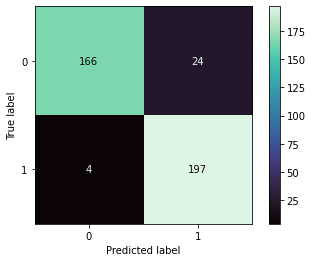

In [20]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
y_test, y_test_predict,
labels = clf.classes_,
cmap ='mako'
);

In [21]:
print(classification_report(y_test, y_test_predict, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.98      0.87      0.92       190
        Spam       0.89      0.98      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



# changing class prior

# Classifier

In [22]:
clf = MultinomialNB(class_prior = np.array([0.55,0.45]))

In [23]:
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.55, 0.45]))

In [24]:
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.55, 0.45]), 'fit_prior': True}

In [25]:
y_test_predict = clf.predict(x_test_transf)

# Confusion Matrix

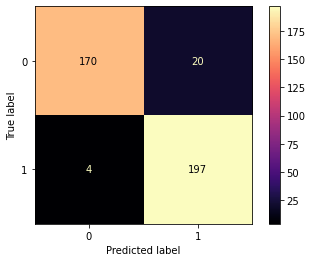

In [26]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
y_test, y_test_predict,
labels = clf.classes_,
cmap ='magma'
);

In [27]:
print(classification_report(y_test, y_test_predict, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.98      0.89      0.93       190
        Spam       0.91      0.98      0.94       201

    accuracy                           0.94       391
   macro avg       0.94      0.94      0.94       391
weighted avg       0.94      0.94      0.94       391



# changing class prior

# Classifier

In [28]:
clf = MultinomialNB(class_prior = np.array([0.6,0.4]))

In [29]:
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [30]:
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.6, 0.4]), 'fit_prior': True}

In [31]:
y_test_predict = clf.predict(x_test_transf)

# Confusion Matrix

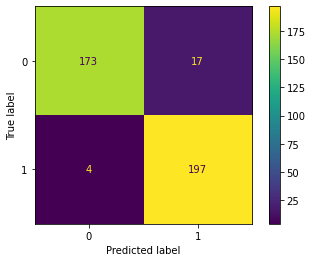

In [32]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
y_test, y_test_predict,
labels = clf.classes_,
cmap ='viridis'
);

In [33]:
print(classification_report(y_test, y_test_predict, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.98      0.91      0.94       190
        Spam       0.92      0.98      0.95       201

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



# changing class prior

# Classifier

In [34]:
clf = MultinomialNB(class_prior = np.array([0.65,0.35]))

In [35]:
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.65, 0.35]))

In [36]:
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.65, 0.35]), 'fit_prior': True}

In [37]:
y_test_predict = clf.predict(x_test_transf)

# Confusion Matrix

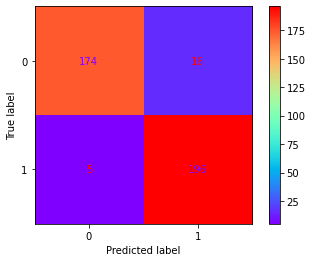

In [38]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
y_test, y_test_predict,
labels = clf.classes_,
cmap ='rainbow'
);

In [39]:
print(classification_report(y_test, y_test_predict, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.92      0.94       190
        Spam       0.92      0.98      0.95       201

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391

